In [1]:
import networkx as nx

네트워크 데이터를 아래와 같이 사전 형태로 저장했습니다.

In [2]:
network_dict = {1: [3], 2: [4, 5, 6], 3: [1, 4], 4: [2, 6], 5: [2, 6], 6: [2, 4, 5]}

### Empty network (graph) 생성하기

Undirected graph를 Graph() 함수를 사용해서 생성합니다.

In [3]:
g = nx.Graph()

### 노드 추가하기

In [4]:
# 한번에 하나의 노드 추가하기
#g.add_node(1)

In [5]:
# 한번에 여러개의 노드 추가하기
g.add_nodes_from([1,2,3,4,5,6]) # Add nodes from a list
#g.add_nodes_from(list(network_dict.keys())) 

In [6]:
# 네트워크에 속한 노드 정보 확인하기
print(g.nodes())

[1, 2, 3, 4, 5, 6]


#### 노드 속성 정보 추가하기

In [7]:
# Add node attributes
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

In [8]:
print(nx.get_node_attributes(g, 'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


### Tie 추가하기

In [9]:
# 한번에 하나의 타이 추가하기
# g.add_edge(1,3) => 1번과 3번 노드 사이의 tie 추가

In [10]:
# 한번에 여러개의 타이 추가하기
# g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)]) 

In [11]:
# 사전 데이터를 사용해서 타이 추가하기
for node in network_dict.keys():
    for friend in network_dict[node]:
        g.add_edge(node, friend)

In [12]:
# 네트워크의 tie 정보 확인하기
print(g.edges())

[(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]


#### tie 속성 정보 추가하기

In [13]:
# Add edge attributes
g[1][3]['weight'] = 3
# alternatively 
# g.edges[1, 3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4

tie 속성 정보 확인하기

In [14]:
print(nx.get_edge_attributes(g, 'weight'))

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}


In [15]:
g.adj

AdjacencyView({1: {3: {'weight': 3}}, 2: {4: {'weight': 1}, 5: {'weight': 4}, 6: {'weight': 3}}, 3: {1: {'weight': 3}, 4: {'weight': 2}}, 4: {2: {'weight': 1}, 3: {'weight': 2}, 6: {'weight': 3}}, 5: {2: {'weight': 4}, 6: {'weight': 4}}, 6: {2: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 4}}})

### NetworkX를 통한 네트워크 분석

#### matplotlib을 이용한 시각화

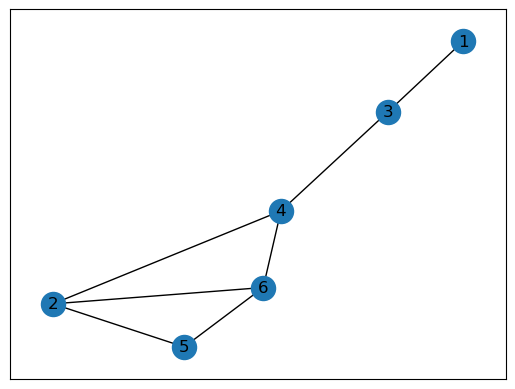

In [16]:
import matplotlib.pyplot as plt 
# networkX를 이용해서 시각화 하기
nx.draw_networkx(g)
plt.show()

#### 네트워크의 기본 정보 추출하기

In [17]:
# 노드 목록 확인하기
print(g.nodes())

[1, 2, 3, 4, 5, 6]


In [18]:
# tie 목록 확인하기
print(g.edges())

[(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]


In [19]:
# 노드의 수 확인하기
g.number_of_nodes()

6

In [20]:
# tie의 수 확인하기
g.number_of_edges()

7

이웃 노드 정보 확인하기

In [21]:
list(g.neighbors(2))

[4, 5, 6]

In [22]:
g.neighbors(2) # g.neighbors()는 generator => for 문을 가지고 사용해야 함

In [23]:
for friend in g.neighbors(2):
    print(friend)

4
5
6


In [24]:
print(g[2])

{4: {'weight': 1}, 5: {'weight': 4}, 6: {'weight': 3}}


각 노드의 이웃노드수 확인하기 <br>
직접적으로 연결되어 있는 노드의 수를 degree라고 합니다.

In [25]:
g.degree(2)

3

노드의 속성 정보 확인하기

In [26]:
g.nodes[2]

{'gender': 'female'}

### graphml 파일로 저장하기

In [27]:
nx.write_graphml(g, 'test.graphml')

## 이웃 행렬 (Adjacency matrix) 생성하기

In [28]:
import numpy as np

In [29]:
# 첫번째 방법
A = nx.to_numpy_array(g)

In [30]:
A

array([[0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 1., 4., 3.],
       [3., 0., 0., 2., 0., 0.],
       [0., 1., 2., 0., 0., 3.],
       [0., 4., 0., 0., 0., 4.],
       [0., 3., 0., 3., 4., 0.]])

In [31]:
# 두번째 방법
A1 = nx.adjacency_matrix(g)

In [32]:
A1

<6x6 sparse array of type '<class 'numpy.intc'>'
	with 14 stored elements in Compressed Sparse Row format>

In [33]:
A1.todense()

array([[0, 0, 3, 0, 0, 0],
       [0, 0, 0, 1, 4, 3],
       [3, 0, 0, 2, 0, 0],
       [0, 1, 2, 0, 0, 3],
       [0, 4, 0, 0, 0, 4],
       [0, 3, 0, 3, 4, 0]], dtype=int32)

In [34]:
# 0, 1 값으로된 인접행렬 얻기
nx.to_numpy_array(g, weight=None)

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0.]])

In [35]:
nx.adjacency_matrix(g, weight=None).todense()

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 0]], dtype=int32)

### pandas를 이용해서 인접행렬 csv 파일로 저장하기

In [36]:
import pandas as pd

In [37]:
df = pd.DataFrame(A1.todense())

In [38]:
df

,0,1,2,3,4,5
0,0,0,3,0,0,0
1,0,0,0,1,4,3
2,3,0,0,2,0,0
3,0,1,2,0,0,3
4,0,4,0,0,0,4
5,0,3,0,3,4,0


In [39]:
df.to_csv("adjacency.csv")

### 인접행렬을 이용해서 그래프 생성하기

In [40]:
g1 = nx.from_numpy_array(A)

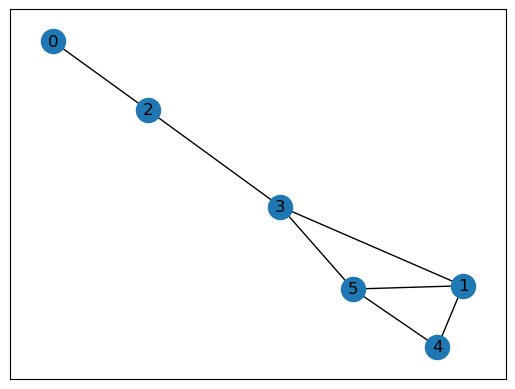

In [41]:
nx.draw_networkx(g1)
plt.show()

## 중심도 구하기

주요 중심도 지표에는 아래와 같은 4가지가 있습니다.
- Degree centrality
- Betweenness centrality
- Closeness centrality
- Eigenvector centrality

#### Degree centrality

In [42]:
nx.degree_centrality(g)

{1: 0.2,
 2: 0.6000000000000001,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [43]:
sorted(nx.degree_centrality(g).items(), key=lambda item: item[1], reverse=True)

[(2, 0.6000000000000001),
 (4, 0.6000000000000001),
 (6, 0.6000000000000001),
 (3, 0.4),
 (5, 0.4),
 (1, 0.2)]

### Betweenness centrality

In [44]:
nx.betweenness_centrality(g)

{1: 0.0,
 2: 0.15000000000000002,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

### Closeness centrality

In [45]:
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 2: 0.625,
 3: 0.5555555555555556,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

### Eigenvector centrality

In [46]:
nx.eigenvector_centrality(g)

{1: 0.07902199743319213,
 2: 0.5299719499101774,
 3: 0.20983546432528058,
 4: 0.4781804804512304,
 5: 0.39915848301808887,
 6: 0.5299719499101774}